In [3]:
%matplotlib inline
import sys
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import feature_extraction
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.core.display import Image
import pydotplus as pydot


In [4]:
data = pd.read_csv( 'Data/playgolf.csv')
data

,Outlook,Temp,Humidity,Windy,Play_Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [5]:
cat_columns = ['Outlook', 'Temp', 'Humidity', 'Windy']
cat_dict = data[cat_columns].to_dict(orient='records')
print( cat_dict )



[{'Windy': False, 'Humidity': 'High', 'Temp': 'Hot', 'Outlook': 'Rainy'}, {'Windy': True, 'Humidity': 'High', 'Temp': 'Hot', 'Outlook': 'Rainy'}, {'Windy': False, 'Humidity': 'High', 'Temp': 'Hot', 'Outlook': 'Overcast'}, {'Windy': False, 'Humidity': 'High', 'Temp': 'Mild', 'Outlook': 'Sunny'}, {'Windy': False, 'Humidity': 'Normal', 'Temp': 'Cool', 'Outlook': 'Sunny'}, {'Windy': True, 'Humidity': 'Normal', 'Temp': 'Cool', 'Outlook': 'Sunny'}, {'Windy': True, 'Humidity': 'Normal', 'Temp': 'Cool', 'Outlook': 'Overcast'}, {'Windy': False, 'Humidity': 'High', 'Temp': 'Mild', 'Outlook': 'Rainy'}, {'Windy': False, 'Humidity': 'Normal', 'Temp': 'Cool', 'Outlook': 'Rainy'}, {'Windy': False, 'Humidity': 'Normal', 'Temp': 'Mild', 'Outlook': 'Sunny'}, {'Windy': True, 'Humidity': 'Normal', 'Temp': 'Mild', 'Outlook': 'Rainy'}, {'Windy': True, 'Humidity': 'High', 'Temp': 'Mild', 'Outlook': 'Overcast'}, {'Windy': False, 'Humidity': 'High', 'Temp': 'Hot', 'Outlook': 'Overcast'}, {'Windy': True, 'Humid

In [6]:

vec = feature_extraction.DictVectorizer()
cat_vector = vec.fit_transform(cat_dict).toarray()

print( cat_vector )

[[ 1.  0.  0.  1.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  1.  0.  0.  1.  0.  1.]
 [ 1.  0.  1.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  1.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0.  1.  0.  0.  1.]
 [ 1.  0.  0.  1.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  1.  0.  1.  0.  0.  0.  1.  1.]
 [ 1.  0.  1.  0.  0.  0.  0.  1.  1.]
 [ 1.  0.  1.  0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  1.  0.  0.  1.  1.]]


In [7]:
df_vector = pd.DataFrame(cat_vector)
vector_columns = vec.get_feature_names()
df_vector.columns = vector_columns
df_vector.index = data.index

print( df_vector )


    Humidity=High  Humidity=Normal  Outlook=Overcast  Outlook=Rainy  \
0               1                0                 0              1   
1               1                0                 0              1   
2               1                0                 1              0   
3               1                0                 0              0   
4               0                1                 0              0   
5               0                1                 0              0   
6               0                1                 1              0   
7               1                0                 0              1   
8               0                1                 0              1   
9               0                1                 0              0   
10              0                1                 0              1   
11              1                0                 1              0   
12              1                0                 1              0   
13    

In [8]:
data = data.drop(cat_columns, axis=1)
data = data.join(df_vector)
data.head()

,Play_Golf,Humidity=High,Humidity=Normal,Outlook=Overcast,Outlook=Rainy,Outlook=Sunny,Temp=Cool,Temp=Hot,Temp=Mild,Windy
0,No,1,0,0,1,0,0,1,0,0
1,No,1,0,0,1,0,0,1,0,1
2,Yes,1,0,1,0,0,0,1,0,0
3,Yes,1,0,0,0,1,0,0,1,0
4,Yes,0,1,0,0,1,1,0,0,0


In [9]:

# Assign an ID to the models
data.loc[data.Play_Golf == 'No','decision'] = 0
data.loc[data.Play_Golf == 'Yes','decision'] = 1
data.decision.value_counts()

1    9
0    5
dtype: int64

In [10]:
# Split the data set into features and labels
features = data.drop(['Play_Golf'], axis=1)
labels = data.Play_Golf

features.head()


,Humidity=High,Humidity=Normal,Outlook=Overcast,Outlook=Rainy,Outlook=Sunny,Temp=Cool,Temp=Hot,Temp=Mild,Windy,decision
0,1,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,1,0,1,0
2,1,0,1,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,1,0,1
4,0,1,0,0,1,1,0,0,0,1


In [13]:
test_features = features[-1:]
test_label = labels[-1:]

test_features

,Humidity=High,Humidity=Normal,Outlook=Overcast,Outlook=Rainy,Outlook=Sunny,Temp=Cool,Temp=Hot,Temp=Mild,Windy,decision
13,1,0,0,0,1,0,0,1,1,0


In [14]:
# Train the decision tree based on the entropy criterion
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(features[:-1], labels[:-1])
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [15]:
# Make a prediction with test data
pred = clf.predict(test_features)
print(features[-1:].T)
print('Predicted class:', pred)
print('Accurate prediction?', pred[0] == test_label.values[0])

                  13
Humidity=High      1
Humidity=Normal    0
Outlook=Overcast   0
Outlook=Rainy      0
Outlook=Sunny      1
Temp=Cool          0
Temp=Hot           0
Temp=Mild          1
Windy              1
decision           0
Predicted class: ['No']
Accurate prediction? True


In [16]:
test_features

,Humidity=High,Humidity=Normal,Outlook=Overcast,Outlook=Rainy,Outlook=Sunny,Temp=Cool,Temp=Hot,Temp=Mild,Windy,decision
13,1,0,0,0,1,0,0,1,1,0


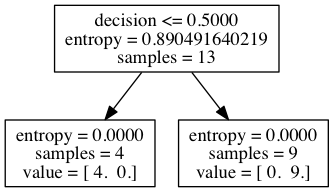

In [22]:
# Visualize the decision tree
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data, feature_names=features.columns) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [18]:
test_features = features[-4:-3]
test_label = labels[-4:-3]
pred = clf.predict(test_features)
print(features[-1:].T)
print('Predicted class:', pred)
print('Accurate prediction?', pred[0] == test_label.values[0])


                  13
Humidity=High      1
Humidity=Normal    0
Outlook=Overcast   0
Outlook=Rainy      0
Outlook=Sunny      1
Temp=Cool          0
Temp=Hot           0
Temp=Mild          1
Windy              1
decision           0
Predicted class: ['Yes']
Accurate prediction? True


In [20]:
from sklearn import metrics

print( metrics.accuracy_score( pred, y_train_pred))


1.0
